In [1]:
import numpy as np
import pandas as pd
import pickle as pkl

import networkx as nx
from plotnine import *

In [2]:
with open('../data/networks/computational_biology.pkl', 'rb') as in_file:
    cb_network = pkl.load(in_file)

cb_network

In [3]:
len(cb_network.nodes)

196494

196494


-13.206491420980544

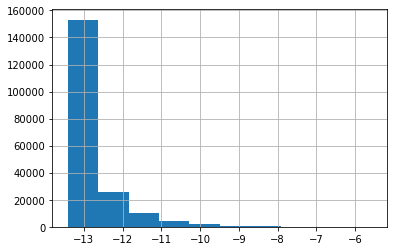

In [4]:
with open('../output/computational_biology-genetics-pagerank.pkl', 'rb') as in_file:
    cb_g_pageranks = pkl.load(in_file)
data_dict = {'doi': [], 'pagerank': []}

for doi, pagerank in cb_g_pageranks.items():
    data_dict['doi'].append(doi)
    data_dict['pagerank'].append(pagerank)

cb_df = pd.DataFrame(data_dict)
print(len(cb_df))

cb_df['log_pagerank'] = np.log(cb_df['pagerank'])
cb_df['log_pagerank'].hist()
cb_df['log_pagerank'].median()

196494


-13.226451126910032

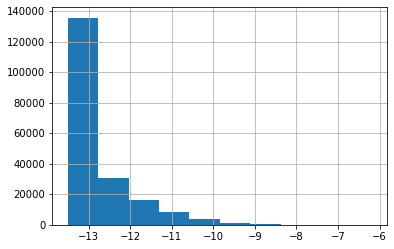

In [5]:
with open('../output/shuffle_results/computational_biology-genetics_42-pagerank.pkl', 'rb') as in_file:
    cb_g_pageranks = pkl.load(in_file)
data_dict = {'doi': [], 'pagerank': []}

for doi, pagerank in cb_g_pageranks.items():
    data_dict['doi'].append(doi)
    data_dict['pagerank'].append(pagerank)

shuffle_df = pd.DataFrame(data_dict)
print(len(shuffle_df))
shuffle_df['log_pagerank'] = np.log(shuffle_df['pagerank'])
shuffle_df['log_pagerank'].hist()
shuffle_df['log_pagerank'].median()

In [6]:
cb_df.sort_values(by='pagerank', ascending=True)

,doi,pagerank,log_pagerank
196493,10.3390/ijerph19042392,0.000001,-13.418357
152836,10.1186/s12885-019-6479-2,0.000001,-13.418357
110115,10.1159/000458154,0.000001,-13.418357
75909,10.1080/15548627.2018.1525476,0.000001,-13.418357
152830,10.1186/s12885-019-6309-6,0.000001,-13.418357
...,...,...,...
1096,10.1038/nature01511,0.002132,-6.150739
849,10.1093/bioinformatics/btp352,0.002403,-6.030857
6432,10.1146/annurev.genom.9.081307.164359,0.002494,-5.994017
1187,10.1126/science.1058040,0.003566,-5.636369


In [7]:
merged_df = cb_df.merge(shuffle_df, on='doi')
merged_df.rename({'pagerank_x': 'true_pagerank', 'log_pagerank_x': 'log_true_pagerank',
                  'pagerank_y': 'single_shuffle_pagerank', 'log_pagerank_y': 'log_single_shuffle_pagerank'},
                 axis='columns', inplace=True)
merged_df

,doi,true_pagerank,log_true_pagerank,single_shuffle_pagerank,log_single_shuffle_pagerank
0,10.1038/ng0495-347,0.000182,-8.614134,0.000034,-10.294938
1,10.1038/35015718,0.000212,-8.460242,0.000100,-9.213466
2,10.1126/science.274.5287.536,0.000799,-7.131768,0.000058,-9.750076
3,10.3945/ajcn.110.001289,0.000002,-13.307770,0.000016,-11.074544
4,10.1017/s0007114508076253,0.000004,-12.521106,0.000003,-12.570533
...,...,...,...,...,...
196489,10.1155/2022/6192190,0.000001,-13.418357,0.000001,-13.501082
196490,10.1007/978-1-0716-2071-7_17,0.000001,-13.418357,0.000001,-13.501082
196491,10.1093/ndt/gfab320,0.000001,-13.418357,0.000001,-13.501082
196492,10.2174/1381612822666160907093215,0.000002,-13.389202,0.000001,-13.470039


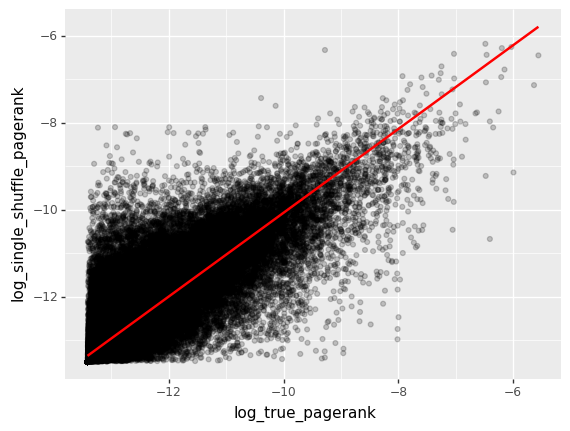

<ggplot: (8785703461351)>

In [8]:
plot = ggplot(merged_df, aes(x='log_true_pagerank', y='log_single_shuffle_pagerank')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot

In [9]:
data_dict = {'doi': [], 'pagerank': [], 'shuffle': []}
for i in range(100):
    with open(f'../output/shuffle_results/computational_biology-genetics_{i}-pagerank.pkl', 'rb') as in_file:
        pageranks = pkl.load(in_file)

    for doi, pagerank in pageranks.items():
        data_dict['doi'].append(doi)
        data_dict['pagerank'].append(pagerank)
        data_dict['shuffle'].append(i)

shuffle_df = pd.DataFrame(data_dict)

In [10]:
shuffle_df['log_pagerank'] = np.log(shuffle_df['pagerank'])
shuffle_df.groupby('doi').median()

,pagerank,shuffle,log_pagerank
doi,,,
10.1001/2012.jama.10820,0.000001,49.5,-13.457003
10.1001/amajethics.2018.834,0.000001,49.5,-13.480682
10.1001/amajethics.2018.873,0.000002,49.5,-13.314345
10.1001/archfami.2.11.1158,0.000003,49.5,-12.849631
10.1001/archfami.2.11.1179,0.000003,49.5,-12.605672
...,...,...,...
10.7861/clinmedicine.19-4-273,0.000002,49.5,-13.316940
10.7863/jum.2010.29.6.963,0.000001,49.5,-13.498591
10.7883/yoken.67.62,0.000003,49.5,-12.877177


In [11]:
shuffle_df.groupby('doi').std()

,pagerank,shuffle,log_pagerank
doi,,,
10.1001/2012.jama.10820,5.163222e-09,29.011492,0.003604
10.1001/amajethics.2018.834,5.161339e-09,29.011492,0.003689
10.1001/amajethics.2018.873,7.562177e-08,29.011492,0.040173
10.1001/archfami.2.11.1158,5.245486e-09,29.011492,0.001995
10.1001/archfami.2.11.1179,1.686245e-06,29.011492,0.381738
...,...,...,...
10.7861/clinmedicine.19-4-273,1.959817e-07,29.011492,0.087332
10.7863/jum.2010.29.6.963,5.159967e-09,29.011492,0.003754
10.7883/yoken.67.62,3.107181e-06,29.011492,0.431985


In [12]:
merged_df = cb_df.merge(shuffle_df.groupby('doi').median(), on='doi')
merged_df.rename({'pagerank_x': 'true_pagerank', 'log_pagerank_x': 'log_true_pagerank',
                  'pagerank_y': 'median_shuffle_pagerank', 'log_pagerank_y': 'log_median_shuffle_pagerank'},
                  axis='columns', inplace=True)
merged_df

,doi,true_pagerank,log_true_pagerank,median_shuffle_pagerank,shuffle,log_median_shuffle_pagerank
0,10.1038/ng0495-347,0.000182,-8.614134,0.000032,49.5,-10.361685
1,10.1038/35015718,0.000212,-8.460242,0.000091,49.5,-9.301914
2,10.1126/science.274.5287.536,0.000799,-7.131768,0.000053,49.5,-9.839541
3,10.3945/ajcn.110.001289,0.000002,-13.307770,0.000002,49.5,-13.372071
4,10.1017/s0007114508076253,0.000004,-12.521106,0.000004,49.5,-12.524224
...,...,...,...,...,...,...
196489,10.1155/2022/6192190,0.000001,-13.418357,0.000001,49.5,-13.498591
196490,10.1007/978-1-0716-2071-7_17,0.000001,-13.418357,0.000001,49.5,-13.498591
196491,10.1093/ndt/gfab320,0.000001,-13.418357,0.000001,49.5,-13.498591
196492,10.2174/1381612822666160907093215,0.000002,-13.389202,0.000001,49.5,-13.467620


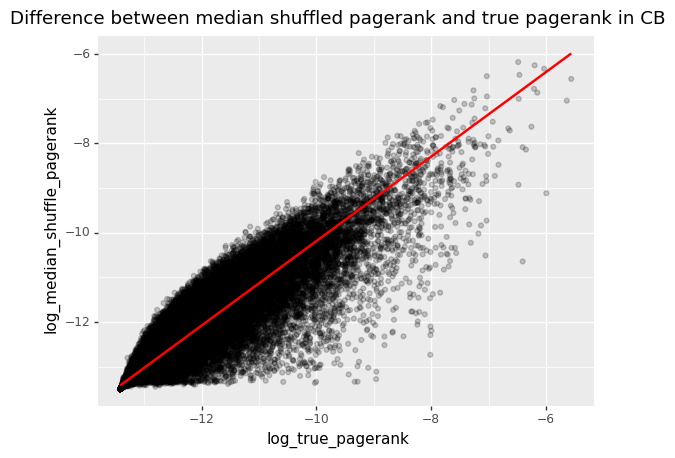

<ggplot: (8785703366005)>

In [13]:
plot = ggplot(merged_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += ggtitle('Difference between median shuffled pagerank and true pagerank in CB')
plot

In [14]:
with open('../data/networks/computational_biology-genetics.pkl', 'rb') as in_file:
    cb_network = pkl.load(in_file)

In [15]:
network_info = {'doi': [], 'in_degree': [], 'out_degree': []}
for doi in cb_network.nodes():
    network_info['doi'].append(doi)
    network_info['in_degree'].append(cb_network.in_degree(doi))
    network_info['out_degree'].append(cb_network.out_degree(doi))
    
node_degrees = pd.DataFrame(network_info)

In [16]:
degree_df = merged_df.merge(node_degrees, on='doi')
degree_df

,doi,true_pagerank,log_true_pagerank,median_shuffle_pagerank,shuffle,log_median_shuffle_pagerank,in_degree,out_degree
0,10.1038/ng0495-347,0.000182,-8.614134,0.000032,49.5,-10.361685,43,0
1,10.1038/35015718,0.000212,-8.460242,0.000091,49.5,-9.301914,98,0
2,10.1126/science.274.5287.536,0.000799,-7.131768,0.000053,49.5,-9.839541,88,1
3,10.3945/ajcn.110.001289,0.000002,-13.307770,0.000002,49.5,-13.372071,2,1
4,10.1017/s0007114508076253,0.000004,-12.521106,0.000004,49.5,-12.524224,7,10
...,...,...,...,...,...,...,...,...
196489,10.1155/2022/6192190,0.000001,-13.418357,0.000001,49.5,-13.498591,0,1
196490,10.1007/978-1-0716-2071-7_17,0.000001,-13.418357,0.000001,49.5,-13.498591,0,1
196491,10.1093/ndt/gfab320,0.000001,-13.418357,0.000001,49.5,-13.498591,0,1
196492,10.2174/1381612822666160907093215,0.000002,-13.389202,0.000001,49.5,-13.467620,1,0


In [17]:
degree_df['log_in_degree'] = np.log(degree_df['in_degree'])
degree_df['log_out_degree'] = np.log(degree_df['out_degree'])
degree_df['zero_citing'] = degree_df['in_degree'] < 1
degree_df['zero_cited'] = degree_df['out_degree'] < 1
degree_df['degree'] = degree_df['in_degree'] + degree_df['out_degree']

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log


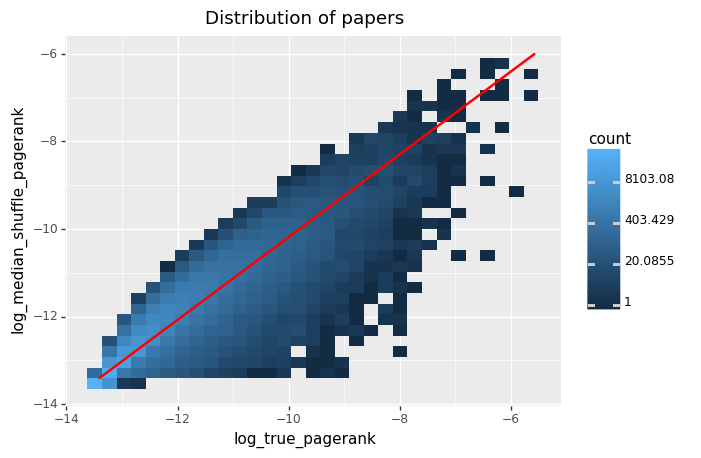

<ggplot: (8785703568556)>

In [18]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank'))
plot += geom_bin2d()
plot += geom_smooth(color='red')
plot += ggtitle('Distribution of papers')
plot += scale_fill_gradient( trans = 'log' )
plot

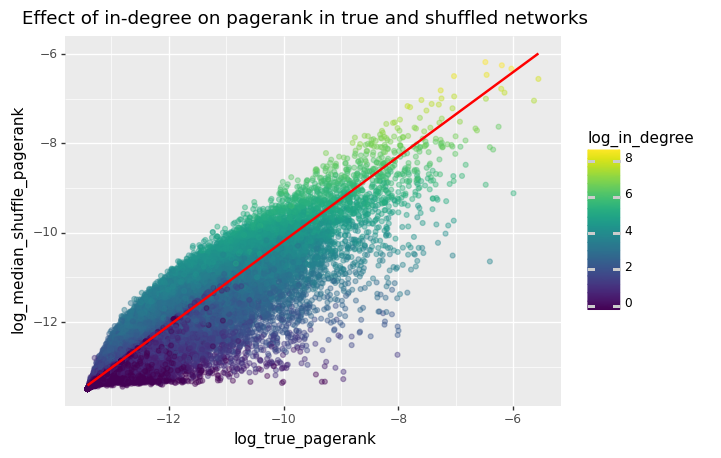

<ggplot: (8785701610088)>

In [19]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='log_in_degree')) 
plot += geom_point(alpha=.4)
plot += geom_smooth(color='red')
plot += ggtitle('Effect of in-degree on pagerank in true and shuffled networks')
plot

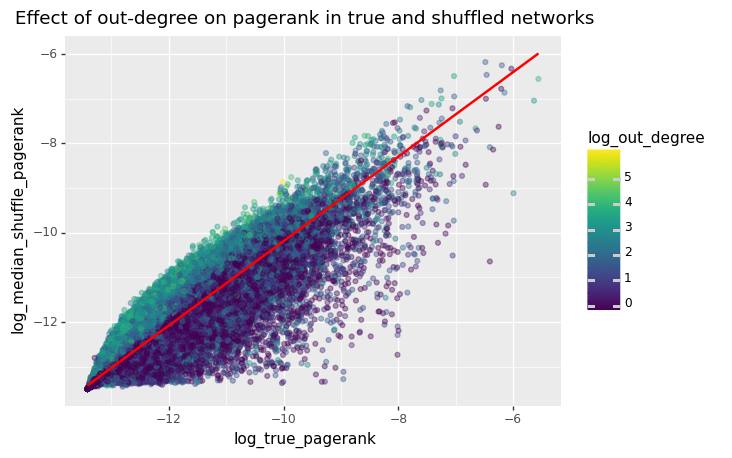

<ggplot: (8785703430832)>

In [20]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='log_out_degree')) 
plot += geom_point(alpha=.4)
plot += geom_smooth(color='red')
plot += ggtitle('Effect of out-degree on pagerank in true and shuffled networks')
plot

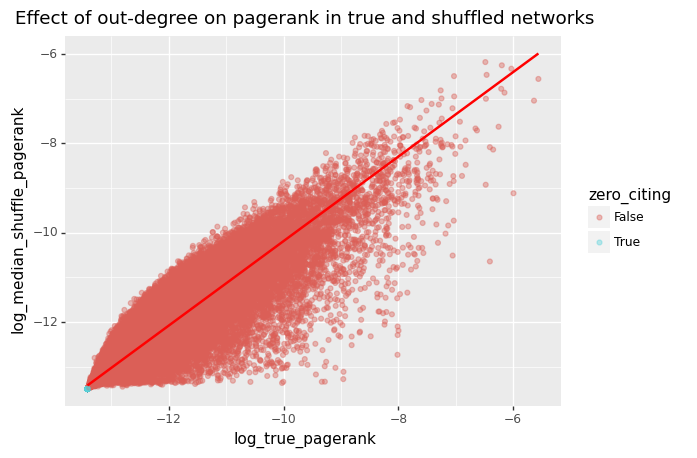

<ggplot: (8785679733286)>

In [21]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='zero_citing')) 
plot += geom_point(alpha=.4)
plot += geom_smooth(color='red')
plot += ggtitle('Effect of out-degree on pagerank in true and shuffled networks')
plot

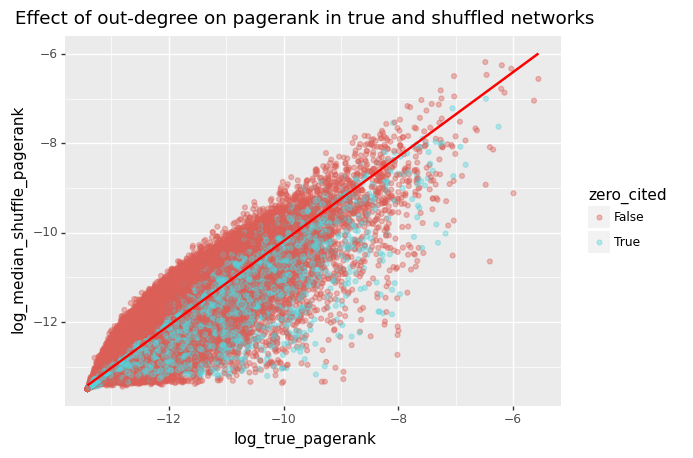

<ggplot: (8785441402649)>

In [22]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='zero_cited')) 
plot += geom_point(alpha=.4)
plot += geom_smooth(color='red')
plot += ggtitle('Effect of out-degree on pagerank in true and shuffled networks')
plot

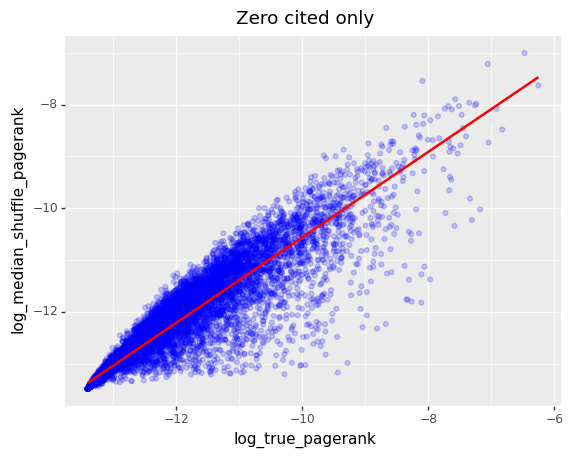

<ggplot: (8785441143409)>

In [23]:
plot = ggplot(degree_df[degree_df['zero_cited'] == True], aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='zero_cited')) 
plot += geom_point(alpha=.2, color='blue')
plot += geom_smooth(color='red')
plot += ggtitle('Zero cited only')
plot

<AxesSubplot:>

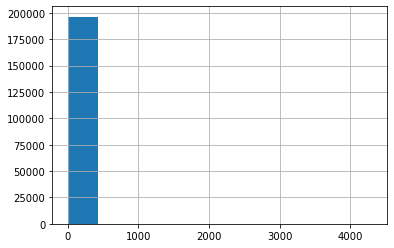

In [24]:
degree_df['in_degree'].hist()

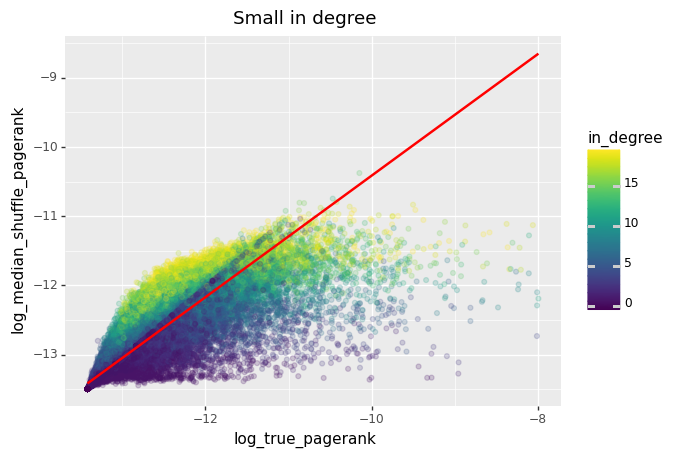

<ggplot: (8785703430889)>

In [25]:
plot = ggplot(degree_df[degree_df['in_degree'] < 20], aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='in_degree')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += ggtitle('Small in degree')
plot

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


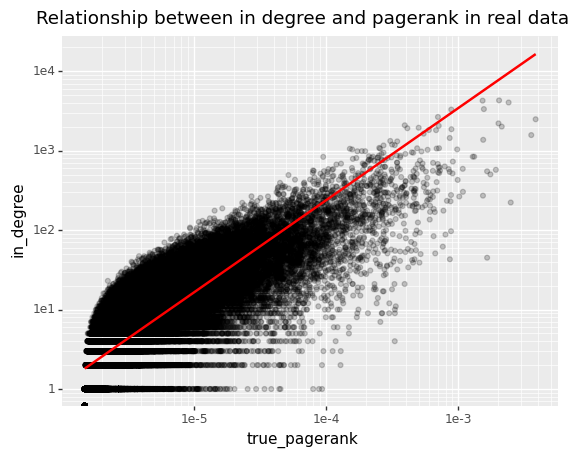

<ggplot: (8785522428130)>

In [26]:
plot = ggplot(degree_df, aes(x='true_pagerank', y='in_degree')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += scale_y_log10()
plot += scale_x_log10()
plot += ggtitle('Relationship between in degree and pagerank in real data')
plot

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


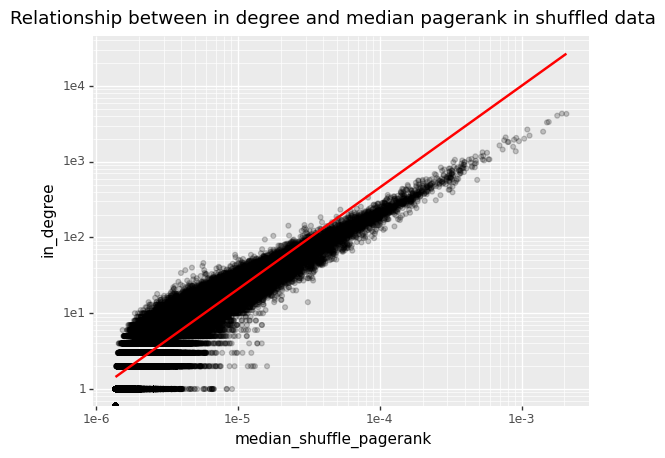

<ggplot: (8785522435748)>

In [27]:
plot = ggplot(degree_df, aes(x='median_shuffle_pagerank', y='in_degree')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += scale_y_log10()
plot += scale_x_log10()
plot += ggtitle('Relationship between in degree and median pagerank in shuffled data')
plot

In [28]:
with open('../output/shuffle_results/computational_biology-genetics_42-pagerank.pkl', 'rb') as in_file:
    cb_g_pageranks = pkl.load(in_file)
data_dict = {'doi': [], 'pagerank': []}

for doi, pagerank in cb_g_pageranks.items():
    data_dict['doi'].append(doi)
    data_dict['pagerank'].append(pagerank)

shuffle_df = pd.DataFrame(data_dict)
shuffle_df['log_pagerank'] = np.log(shuffle_df['pagerank'])

merged_df = cb_df.merge(shuffle_df, on='doi')
merged_df.rename({'pagerank_x': 'true_pagerank', 'log_pagerank_x': 'log_true_pagerank',
                  'pagerank_y': 'single_shuffle_pagerank', 'log_pagerank_y': 'log_single_shuffle_pagerank'},
                 axis='columns', inplace=True)

single_df = merged_df.merge(node_degrees, on='doi')
single_df

,doi,true_pagerank,log_true_pagerank,single_shuffle_pagerank,log_single_shuffle_pagerank,in_degree,out_degree
0,10.1038/ng0495-347,0.000182,-8.614134,0.000034,-10.294938,43,0
1,10.1038/35015718,0.000212,-8.460242,0.000100,-9.213466,98,0
2,10.1126/science.274.5287.536,0.000799,-7.131768,0.000058,-9.750076,88,1
3,10.3945/ajcn.110.001289,0.000002,-13.307770,0.000016,-11.074544,2,1
4,10.1017/s0007114508076253,0.000004,-12.521106,0.000003,-12.570533,7,10
...,...,...,...,...,...,...,...
196489,10.1155/2022/6192190,0.000001,-13.418357,0.000001,-13.501082,0,1
196490,10.1007/978-1-0716-2071-7_17,0.000001,-13.418357,0.000001,-13.501082,0,1
196491,10.1093/ndt/gfab320,0.000001,-13.418357,0.000001,-13.501082,0,1
196492,10.2174/1381612822666160907093215,0.000002,-13.389202,0.000001,-13.470039,1,0


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


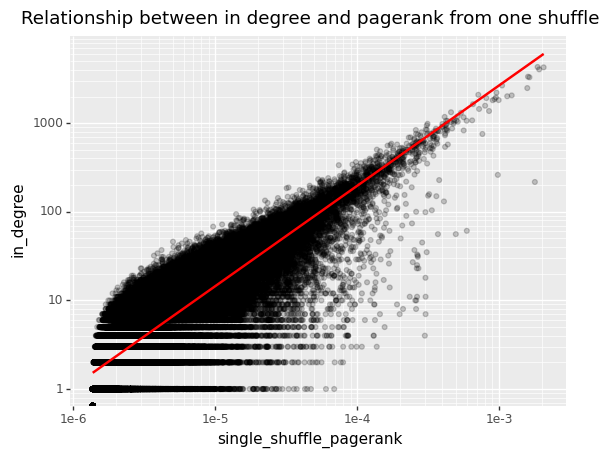

<ggplot: (8785435983749)>

In [29]:
plot = ggplot(single_df, aes(x='single_shuffle_pagerank', y='in_degree')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += scale_y_log10()
plot += scale_x_log10()
plot += ggtitle('Relationship between in degree and pagerank from one shuffle')
plot

#### Result
The shuffled graph has a bit less variance at the end than the true pageranks. I think this is because shuffling networks disrupts community structure, causing pageranks to become more dependant on a given node's in-degree

In [32]:
degree_df['difference'] = degree_df['log_true_pagerank'] - degree_df['log_median_shuffle_pagerank']

In [33]:
degree_df.sort_values(by='difference')

,doi,true_pagerank,log_true_pagerank,median_shuffle_pagerank,shuffle,log_median_shuffle_pagerank,in_degree,out_degree,log_in_degree,log_out_degree,zero_citing,zero_cited,degree,difference
20232,10.1038/nmeth.4256,0.000014,-11.154957,0.000052,49.5,-9.865525,176,35,5.170484,3.555348,False,False,211,-1.289432
22087,10.1038/s41467-018-03367-w,0.000009,-11.581490,0.000034,49.5,-10.295697,105,21,4.653960,3.044522,False,False,126,-1.285793
20230,10.1038/s41592-018-0003-5,0.000009,-11.584660,0.000032,49.5,-10.337088,108,33,4.682131,3.496508,False,False,141,-1.247573
19883,10.1146/annurev-anchem-071015-041550,0.000013,-11.236863,0.000046,49.5,-9.989430,141,59,4.948760,4.077537,False,False,200,-1.247433
30166,10.1038/nprot.2015.015,0.000013,-11.233170,0.000046,49.5,-9.987588,122,41,4.804021,3.713572,False,False,163,-1.245582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78845,10.1089/cmb.2005.12.407,0.000336,-7.997305,0.000005,49.5,-12.192292,11,1,2.397895,0.000000,False,False,12,4.194988
27799,10.1002/jms.290,0.001652,-6.405627,0.000024,49.5,-10.644498,45,1,3.806662,0.000000,False,False,46,4.238871
11965,10.1093/bioinformatics/btn565,0.000331,-8.013264,0.000005,49.5,-12.290721,10,4,2.302585,1.386294,False,False,14,4.277458
106144,10.1126/stke.2001.103.pe33,0.000128,-8.960395,0.000002,49.5,-13.276680,2,5,0.693147,1.609438,False,False,7,4.316285


<AxesSubplot:>

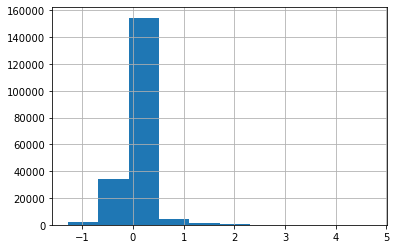

In [34]:
degree_df['difference'].hist()